In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
%matplotlib inline

## Concatenating and Splitting Arrays
numpy.concatenate takes a sequence (tuple, list, etc.) of arrays and joins them
together in order along the input axis

In [ ]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])

In [ ]:
np.concatenate([arr1, arr2], axis=0)

In [ ]:
np.concatenate([arr1, arr2], axis=1)

In [ ]:
np.vstack((arr1,arr2))

In [ ]:
np.hstack((arr1,arr2))

In [ ]:
arr = np.random.randn(5, 2)
arr

In [ ]:
first, second, third = np.split(arr, [1, 3],axis=0)

In [ ]:
first

In [ ]:
second

In [ ]:
third

## Universal Functions
A universal function, or ufunc, is a function that performs element-wise operations on data in ndarrays. They are fast wrapper functions that take one or more scalar values and produce one or more scalar results. Many ufuncs are simple element-wise transformations, like sqrt or exp:


In [ ]:
arr = np.arange(1,10)
arr

In [ ]:
np.sqrt(arr)

In [ ]:
arr_log = np.log(arr)
arr_log

In [ ]:
arr = np.exp(arr_log)
arr

In [ ]:
x = np.random.randn(8)
y = np.random.randn(8)

In [ ]:
x

In [ ]:
y

In [ ]:
np.maximum(x, y)

### Common Unary Ufuncs on Arrays
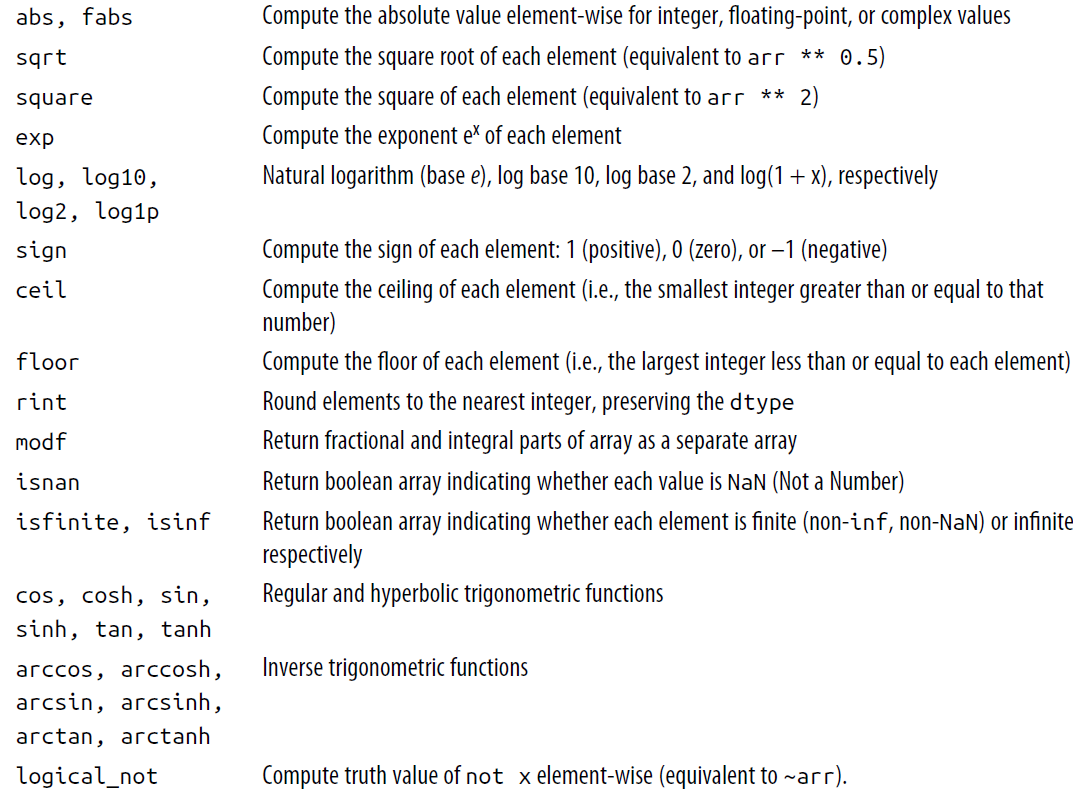

## Common Binary Ufuncs on Arrays
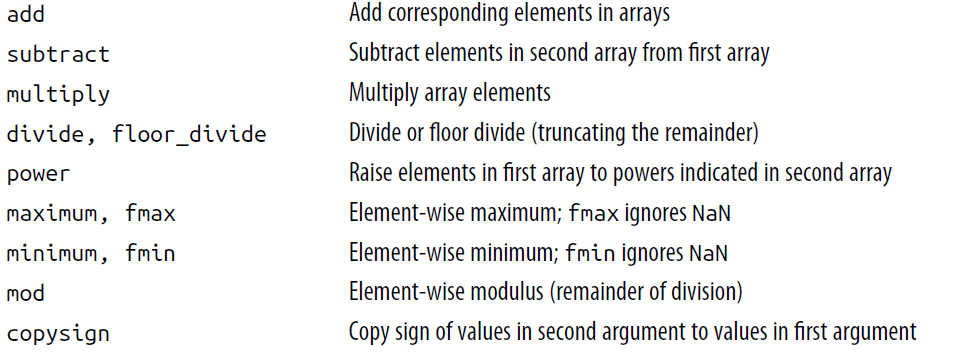

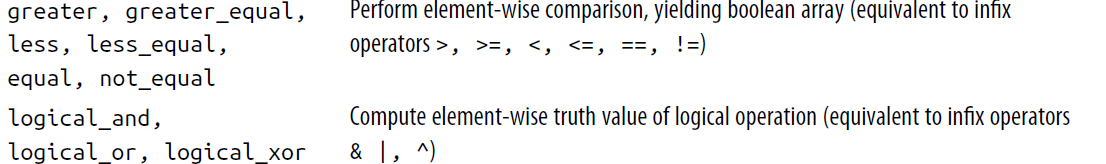

### High speed conditional operations

Suppose we wanted to take a value from xarr whenever the corresponding value in cond is True, and otherwise take the value from yarr. 

A list comprehension doing this might look like:

In [ ]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [ ]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

In [ ]:
result = np.where(cond, xarr, yarr)
result

Suppose we had a matrix of randomly generated data and you wanted to replace all positive values with 2 and all negative values with –2. This is very easy to do with np.where:


In [ ]:
arr = np.random.randn(4, 4)
arr

In [ ]:
arr > 0

In [ ]:
np.where(arr > 0, 2, -2)

We can combine scalars and arrays when using np.where. For example, I can replace all positive values in arr with the constant 2:

In [ ]:
np.where(arr > 0, 2, arr) # set only positive values to 2

## Statistical Functions on Arrays

In [ ]:
arr = np.random.randn(5, 4)
arr

In [ ]:
arr.mean()

In [ ]:
np.mean(arr)

Functions like mean and sum take an optional axis argument that computes the statistic
over the given axis, resulting in an array with one fewer dimension:

In [ ]:
arr.mean(axis=1)

In [ ]:
arr.sum(axis=0)

In [ ]:
arr.cumsum()

In [ ]:
arr.argmin()

In [ ]:
arr.argmax()

In [ ]:
arr.argmin(axis=0)

In [ ]:
arr.argmax(axis=0)

### Statistics for Boolean Arrays

In [ ]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

### Any and All methods
There are two additional methods, any and all, useful especially for boolean arrays.
any tests whether one or more values in an array is True, while all checks if every
value is True:

These methods also work with non-boolean arrays, where non-zero elements evaluate
to True.

In [ ]:
(arr > 0).any()


In [ ]:
(arr > 0).all()

### Unique and Other Set Logic
NumPy has some basic set operations for one-dimensional ndarrays. A commonly used one is np.unique, which returns the sorted unique values in an array:

In [ ]:
names = np.array(['Ali', 'Sohail', 'Sana', 'Umar', 'Sohail', 'Asim', 'Sania'])
np.unique(names)

In [ ]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

In [ ]:
sorted(set(names))

## Save and Load functions

In [ ]:
arr = np.arange(10)
np.save('some_array', arr) #If the file path does not already end in .npy, the extension is appended. 

In [ ]:
np.load('some_array.npy')

You save multiple arrays in an uncompressed archive using np.savez and passing the
arrays as keyword arguments:

In [ ]:
np.savez('array_archive.npz', a=arr, b=arr)

When loading an .npz file, you get back a dict-like object that loads the individual
arrays lazily:

In [ ]:
arch = np.load('array_archive.npz')
arch['b']

In [ ]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

## Linear Algebra on Arrays

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [ ]:
x

In [ ]:
y

In [ ]:
x.dot(y)

In [ ]:
np.dot(x, y)

In [ ]:
np.dot(x, np.ones(3))

In [ ]:
from numpy.linalg import inv, det

In [ ]:
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

In [ ]:
det(mat)

### Common Matrix functions

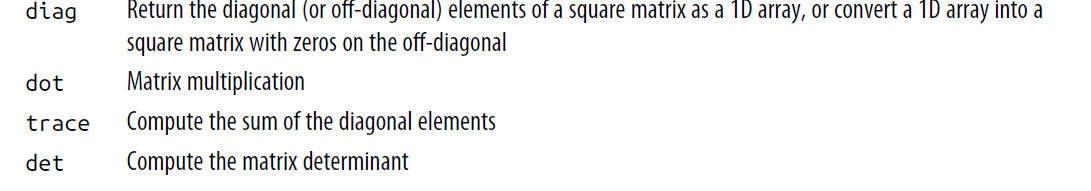

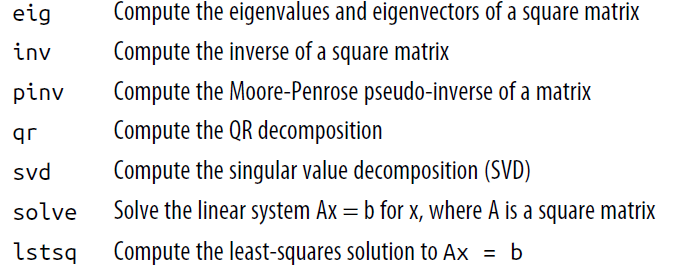

### Random Number Generation

In [ ]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

In [ ]:
np.random.seed(1234)

In [ ]:
rng = np.random.RandomState(1234)
rng.randn(10)

### Commonly used functions available in Numpy Random library 

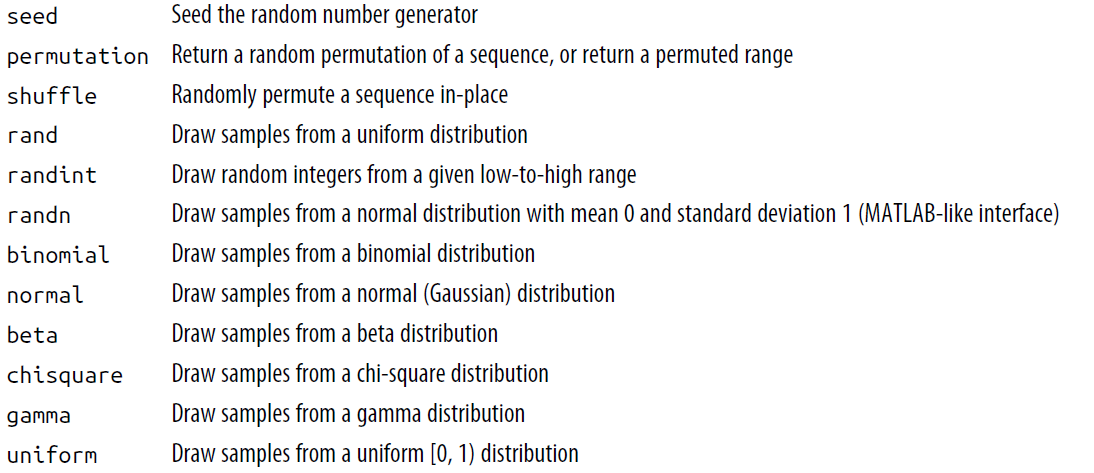

## Broadcasting
Broadcasting describes how arithmetic works between arrays of different shapes.

Combining a scalar value with an array:

In [ ]:
arr = np.arange(5)
arr

In the following, we say that the scalar value 4 has been broadcast to all of the other elements in
the multiplication operation.

In [ ]:
arr * 4

Getting the mean of each column of an array

In [ ]:
arr = np.random.randn(4, 3)

In [ ]:
arr

In [ ]:
m = arr.mean(0)

In [ ]:
m

In [ ]:
m.shape,arr.shape

In [ ]:
demeaned = arr - m
demeaned

In [ ]:
demeaned.mean(0)

## The Broadcasting Rule
Two arrays are compatible for broadcasting if for each trailing dimension (i.e., starting
from the end) the axis lengths match or if either of the lengths is 1. Broadcasting is
then performed over the missing or length 1 dimensions.

In [ ]:
row_mean = arr.mean(1)

In [ ]:
row_mean

In [ ]:
row_mean.shape

In [ ]:
demeaned_rows = arr - row_mean

In [ ]:
demeaned_rows = arr - row_mean.reshape(-1,1)

In [ ]:
demeaned_rows

We often need to add a new axis with length 1 specifically for broadcasting purposes. Using reshape is one option, but inserting an axis requires constructing a tuple indicating the new shape. 
NumPy arrays offer a special syntax for inserting new axes by indexing. We use the special np.newaxis attribute along with “full” slices to insert the new axis:

In [ ]:
arr = np.zeros((4, 4))
arr_3d = arr[:, np.newaxis, :]
arr_3d.shape

In [ ]:
arr_1d = np.random.randn(3)
arr_1d

In [ ]:
arr_1d[:, np.newaxis]

In [ ]:
arr_1d[np.newaxis, :]

In [ ]:
arr = np.random.randn(3, 4, 5)
depth_means = arr.mean(2)
depth_means

In [ ]:
depth_means.shape

In [ ]:
demeaned = arr - depth_means[:, :, np.newaxis]

### Seting values via Broadcasting

In [ ]:
col = np.array([1.28, -0.42, 0.44, 1.6])
col

In [ ]:
arr = np.zeros((4, 3))
arr[:] = col[:, np.newaxis]
arr

In [ ]:
arr[:2] = [[-1.37], [0.509]]
arr

### Random Walk Example: Pure Python

In [ ]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [ ]:
plt.figure()

In [ ]:
plt.plot(walk[:100])

### Random Walk Example: Numpy

In [ ]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [ ]:
print(walk.min())
print(walk.max())

In [ ]:
(np.abs(walk) >= 10).argmax()

In [ ]:
plt.plot(walk[:100])

### Simulating several Random Walks at Once

In [ ]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

In [ ]:
print(walks.max())
print(walks.min())

In [ ]:
hits30 = (np.abs(walks) >= 30)

In [ ]:
hits30

In [ ]:
hits30_across_walks = hits30.any(1)
print(hits30_across_walks)
hits30_across_walks	.sum() # Number that hit 30 or -30

In [ ]:
hits30.shape,hits30_across_walks.shape

In [ ]:
crossing_times = hits30.argmax(1)
crossing_times.mean()